In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as skl
from sklearn.cross_validation import train_test_split

In [2]:
Train = pd.read_csv("Insight_Train_DC.csv")

In [3]:
Train.columns

Index([u'LB', u'AC', u'FM', u'UC', u'DL', u'DS', u'DP', u'ASTV', u'MSTV', u'ALTV', u'MLTV', u'Width', u'Min', u'Max', u'Nmax', u'Nzeros', u'Mode', u'Mean', u'Median', u'Variance', u'Tendency', u'NSP'], dtype='object')

In [4]:
Train.NSP.value_counts()

1    1408
2     154
3     137
dtype: int64

In [5]:
Train.isnull().sum().sum()

54

In [6]:
Train = Train.fillna(0)

In [7]:
Only1 = Train[(Train.NSP == 1)]
len(Only1)

1408

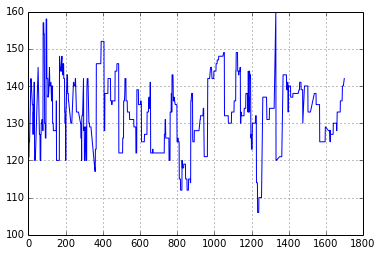

In [8]:
Only1.LB.plot()

In [9]:
Only1.plot(kind = 'box',figsize=(15,10))

ValueError: Invalid chart type given box

In [17]:
Features = Train.iloc[:,:-1]
Values = Train.iloc[:,-1]

In [18]:
Features_train, Features_test, Values_train, Values_test = train_test_split(Features, Values, test_size = 0.3, random_state = 34)

In [19]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(Features_train, Values_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [20]:
clf.score(Features_test,Values_test)

0.92367906066536198

In [21]:
y_pred = clf.predict(Features_test)

In [22]:
from sklearn import metrics
###top is predicted, left is correct
metrics.confusion_matrix(Values_test,y_pred)

array([[428,   0,   5],
       [ 30,  13,   0],
       [  2,   2,  31]])

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=1000)
clf.fit(Features_train, Values_train)
clf.score(Features_test,Values_test)

y_pred = clf.predict(Features_test)

print clf.score(Features_test,Values_test)

print metrics.confusion_matrix(Values_test,y_pred)

print clf.feature_importances_

0.964774951076
[[430   2   1]
 [ 11  31   1]
 [  3   0  32]]
[ 0.02113183  0.06698901  0.03793479  0.03290087  0.03498296  0.00573447
  0.07155774  0.07810115  0.03238304  0.07369595  0.03879467  0.01982016
  0.03411856  0.03380228  0.02001186  0.02772378  0.02016896  0.04216581
  0.04127571  0.0386416   0.02156481]


In [33]:
Test = pd.read_csv('Insight_Test_DC.csv')

In [47]:
TestFeatures = Test.iloc[:,:-1]
TestValues = Test.iloc[:,-1]



test_pred = clf.predict(TestFeatures)
print clf.score(TestFeatures,TestValues)

print metrics.confusion_matrix(TestValues,test_pred)

0.901639344262
[[232  15   0]
 [ 23 118   0]
 [  0   4  35]]
